In [112]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris

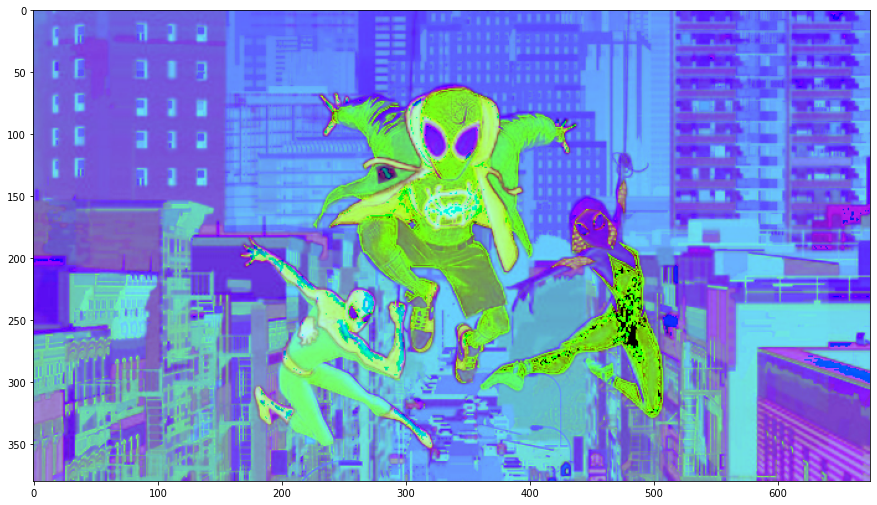

In [113]:
img = cv2.imread('../images/spiderman.jpg')
img_original = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.figure(figsize=(15,10))
plt.imshow(img)

In [114]:
n,m = img.shape[0], img.shape[1]
img.shape, n, m

((380, 675, 3), 380, 675)

## Clustering

In [115]:
vect = img.reshape((n*m,-1))
vect

array([[104, 124, 230],
       [103, 127, 227],
       [104, 128, 229],
       ...,
       [165, 134, 250],
       [164, 133, 247],
       [164, 128, 245]], dtype=uint8)

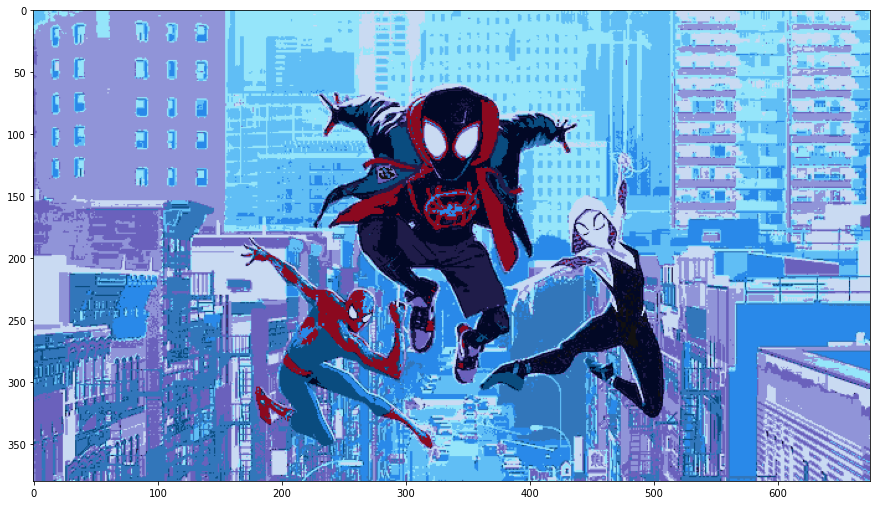

In [116]:
k = 12
model = KMeans(n_clusters=k)
p = model.fit_predict(vect)
new_colors = np.zeros((k,3))
for x in range(k):
    idx = np.where(p == x)
    new_colors[x] = np.mean(vect[idx], axis=0)

new_img = new_colors[p].reshape(img.shape)
new_img = cv2.cvtColor(new_img.astype("uint8"), cv2.COLOR_HSV2RGB)
plt.figure(figsize=(15,10))
plt.imshow(new_img)